<a href="https://colab.research.google.com/github/ShriramJana/AI-Workshop/blob/main/Toxic_Comment_Classification_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Statements
import pandas as pd       # Read in tabular data 
import tensorflow as tf   # Deep Learning Framework (specifically keras)
import numpy as np        # Reshaping arrays, etc.,

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head() 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Preprocessing

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
max_words = 200000 # number of words in the vocab

In [10]:
# output sequence length --> the maximum length of the sentence in tokens
# output mode --> map every word to an integer value 
vectorizer = TextVectorization(max_tokens=max_words, output_sequence_length=1800, output_mode='int')

In [11]:
# Teaching the vectorizer the vocabularly (learns all of the words within the sentences)
vectorizer.adapt(X.values)

In [12]:
# Returned a list of the vocabularly within the dataset
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [13]:
# Example
# Each word within the sentence below is assigned to a number (Hello = 288, world = 263, etc.,)
vectorizer('Hello world, its a beautiful day')[:6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 288,  263,   48,    6, 2977,  307])>

In [14]:
vectorized_text = vectorizer(X.values)

In [15]:
vectorized_text # 159571 samples, 1800 maximum number of words

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [16]:
#MCSBP - map, cache, shuffle, batch, prefetch (from tensor_slices, list_files)
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [17]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [18]:
print(batch_X.shape)
print(batch_y.shape)

(16, 1800)
(16, 6)


In [19]:
train = dataset.take(int(len(dataset)* 0.7)) # 70 percent of all our data 
val = dataset.skip(int(len(dataset)* 0.7)).take(int(len(dataset)* 0.2)) # Skips 70 percent and takes the 20 percent after
test = dataset.skip(int(len(dataset)* 0.9)).take(int(len(dataset)* 0.1)) # Skips 90 percent of the data and takes the remaining 10 percent 

In [20]:
print(len(train)) # 6981 batches (1 batch = 16 digits)
print(len(val)) # 1994 batches (1 batch = 16 digits)
print(len(test)) # 997 batches (1 batch = 16 digits)

6981
1994
997


In [21]:
train_generator = train.as_numpy_iterator()

In [22]:
train_generator.next()

(array([[  207,   227,     3, ...,     0,     0,     0],
        [    8,    69,    10, ...,     0,     0,     0],
        [    1,   320,     2, ...,     0,     0,     0],
        ...,
        [  574, 10460,    94, ...,     0,     0,     0],
        [ 2325,  1288,  8579, ...,     0,     0,     0],
        [ 4073,   839,     3, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Creating the Sequential Model

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [24]:
# Instantiate the Sequential API
model = Sequential()

# Create the embedding layer 
model.add(Embedding(max_words+1, 32)) # 1 embedding per word, 32 values in length

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh'))) #32 different LSTM units, GPU acceleration required on LSTM layer is 'tanh'
# Allows you to pass information in both directions (particularly useful for sentences, as it carefully looks for modifiers prior to key words)

# Feature extractors (fully connected layers)
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer (takes non-linearities into account)
model.add(Dense(6, activation='sigmoid')) # Outputs are going to be between 0 and 1

In [25]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam') # Running 6 different binary classifiers at one time (y[0]) therefore we use BinaryCrossentropy


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 715s 101ms/step - loss: 0.0611 - val_loss: 0.0452
Epoch 2/10
6981/6981 [==============================] - 699s 100ms/step - loss: 0.0455 - val_loss: 0.0391
Epoch 3/10
6981/6981 [==============================] - 691s 99ms/step - loss: 0.0402 - val_loss: 0.0355
Epoch 4/10
6981/6981 [==============================] - 680s 97ms/step - loss: 0.0360 - val_loss: 0.0328
Epoch 5/10
6981/6981 [==============================] - 679s 97ms/step - loss: 0.0320 - val_loss: 0.0287
Epoch 6/10
6981/6981 [==============================] - 679s 97ms/step - loss: 0.0288 - val_loss: 0.0255
Epoch 7/10
6981/6981 [==============================] - 679s 97ms/step - loss: 0.0260 - val_loss: 0.0227
Epoch 8/10
6981/6981 [==============================] - 685s 98ms/step - loss: 0.0236 - val_loss: 0.0203
Epoch 9/10
6981/6981 [==============================] - 681s 98ms/step - loss: 0.0208 - val_loss: 0.0179
Epoch 10/10
6981/6981 [==============================

In [28]:
hist.history

{'loss': [0.06110158562660217,
  0.04546034708619118,
  0.040155280381441116,
  0.036027874797582626,
  0.03204899653792381,
  0.02884669601917267,
  0.026049302890896797,
  0.023626402020454407,
  0.020765060558915138,
  0.018491439521312714],
 'val_loss': [0.045168809592723846,
  0.039090804755687714,
  0.03546948730945587,
  0.032777413725852966,
  0.02867201343178749,
  0.025452880188822746,
  0.022732535377144814,
  0.020329033955931664,
  0.01792001537978649,
  0.015867222100496292]}

<Figure size 576x360 with 0 Axes>

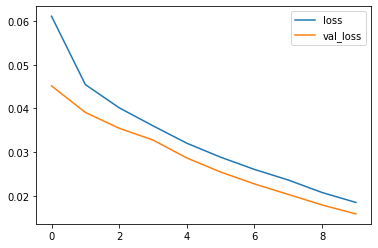

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(hist.history).plot()
plt.show()

# Making Predictions 

In [30]:
# Utilizing vectorizer 
input = vectorizer("I hate you! You suck!")

In [31]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [32]:
model.predict(np.expand_dims(input,0))

array([[9.9924362e-01, 5.9996843e-02, 9.9208707e-01, 7.3829520e-04,
        9.8626882e-01, 1.0913008e-02]], dtype=float32)

In [33]:
batch = test.as_numpy_iterator().next() # Gets the next batch

In [34]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [35]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

#Evaluating the Model

In [37]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    # Unpacking the batch 
    X_true, y_true = batch

    # Make a prediction 
    pred = model.predict(X_true)
    
    # Flatten the predictions --> Shapes into one big 2D array
    y_true = y_true.flatten()
    pred = pred.flatten()
    
    # Calculating the metric on the batch and updating the values
    pre.update_state(y_true, pred)
    re.update_state(y_true, pred)
    acc.update_state(y_true, pred)

In [40]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9210003018379211, Recall:0.9278557300567627, Accuracy:0.4934804439544678


# Testing

In [41]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 9.2 MB/s 
     |████████████████████████████████| 57 kB 6.1 MB/s 
     |████████████████████████████████| 141 kB 66.0 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 72.9 MB/s 
     |████████████████████████████████| 2.3 MB 46.0 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 272 kB 71.2 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 68 kB 8.0 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 856 kB 62.1 MB/s 
     |████████████████████████████████| 4.1 MB 49

In [42]:
import gradio as gr

In [43]:
model.save('ToxicityCC.h5')

In [44]:
model = tf.keras.models.load_model('ToxicityCC.h5')

In [45]:
# Function that will be built into the gradio module to rate each comment
def comm(Comment):
    # Pass the comment through the vectorizer
    vectorized_comment = vectorizer([Comment])

    # Run it through the model
    results = model.predict(vectorized_comment)
    
    # Goes through each column and decides the score for each column (unpacking the results)
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [46]:
# Building the gradio interface
interface = gr.Interface(fn=comm, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Type a comment to rate'),
                        outputs='text')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [47]:
# Launches the Gradio Interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://59669.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f469f24ce10>,
 'http://127.0.0.1:7860/',
 'https://59669.gradio.app')